In [39]:
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
%matplotlib inline

In [49]:
m = 2
k = 10e5
kc = 0*k
c = 0.01
mi = 1
omega = sp.linspace(0, 2*(k/m)**0.5, 50)
w=700

M = sp.array([[m, 0],
                [0, m]])
K = sp.array([[k, kc],
              [-kc, k]])
C = sp.array([[c, 0],
              [0, c]])
I = sp.eye(len(M))
Z = sp.zeros_like(M)
Minv = la.inv(M)

In [50]:
vw = []
for O in omega:
    F = sp.array([[m*mi*(O**2)],[m*mi*(O**2)]])
    x ,y = la.inv(((-O**2)*M+1.j*O*C+K))@ F
    vw.append(sp.absolute(x))

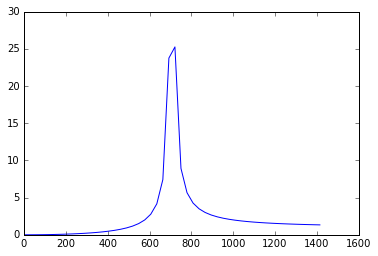

In [51]:
plt.plot(omega, vw)

In [56]:
z0 = [0,0,0,0]
tf = 60
t = sp.linspace(0, tf, 5000)

def func(x,t):
    ta = 1
    A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-Minv @ K, -Minv @ C])])
    f = [0,0,mi*sp.cos(w*t),ta*(w**2)*sp.cos(w*t)]
    
    dxdt = A @ x + f
    return dxdt

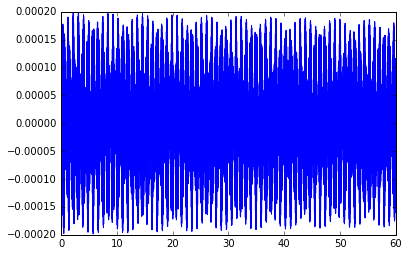

In [57]:
sol = odeint(func, z0, t)
plt.plot(t,sol[:,0])